In [1]:
import pandas as pd, os, gc
import networkx as nx, matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Data Set up

In [2]:
# Download and save the lastfm_asia_edges.csv in the required format
# Download link: https://snap.stanford.edu/data/feather-lastfm-social.html
# Data source: 
    # Author: Benedek Rozemberczki and Rik Sarkar
    # Title: Characteristic Functions on Graphs: Birds of a Feather, from Statistical Descriptors to Parametric Models
    # Year: 2020
    
edges=pd.read_csv(r'data/lastfm_asia/lastfm_asia_edges.csv')
edges

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
...,...,...
27801,7488,7564
27802,7505,7579
27803,7533,7536
27804,7569,7587


In [2]:
# ## Download and save the congresslist.edgelist in the required format
# ## Download link : https://snap.stanford.edu/data/congress-twitter.html
# ## Data source: C.G. Fink, K. Fullin, G. Gutierrez, N. Omodt, S. Zinnecker, 
# ## G. Sprint, and S. McCulloch: A centrality measure for quantifying spread 
# ## on weighted, directed networks. Physica A, 2023.

# G = nx.read_edgelist('data/congress_network/congress.edgelist')

# transition_G = nx.google_matrix(G)
# transition_G=pd.DataFrame(transition_G)

# # Save to Matrix format in txt (transpose to make it column wise stochastic)
# transition_G.T.to_csv('data/matrix-congress.txt', sep=' ', index=True, header=False)

In [18]:
# import json
 
# Opening JSON file
f = open('data/lastfm_asia/lastfm_asia_features.json')
 
# returns JSON object as 
# a dictionary
nodes = json.load(f)

nodes=pd.DataFrame.from_dict(nodes, orient='index')
nodes.isna().sum()

# target=pd.read_csv('lastfm_asia/lastfm_asia_target.csv')
# target

0       173
1       206
2       225
3       233
4       243
       ... 
939    7623
940    7623
941    7623
942    7623
943    7623
Length: 944, dtype: int64

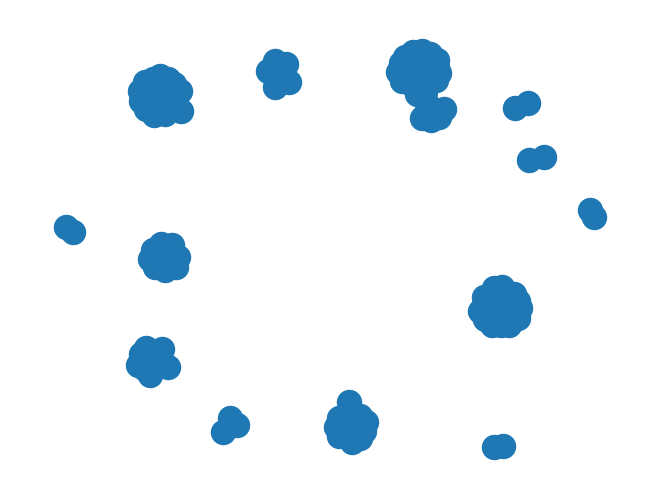

In [3]:
# TEST
G = nx.from_pandas_edgelist(edges.head(100), 'node_1', 'node_2')

# Visualize the graph
nx.draw(G, with_labels=False)
plt.show()

# Community

## Functions

In [4]:
def graph_community(G, community):
    # Visualize the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

    # Assign community colors to nodes
    node_colors = []
    for node in G.nodes():
        for i, comm in enumerate(community):
            if node in comm:
                node_colors.append(i)
                break

    # Draw nodes with community colors
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.rainbow)

    # Optionally, draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    plt.show()

In [5]:
def get_metrics(G, community):
    """
    1. Modularity:
    Returns the modularity of the given partition of the graph.
    
    2. Partition Quality:
    The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.
    The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.
    --> returns (coverage, performance) tuple of the partition
    """
    # similarity metrics
    
    modularity = nx.algorithms.community.modularity(G, community)
    partion_quality = nx.algorithms.community.partition_quality(G, community) 
#     silhouette = silhouette_score(G, community)

    # Ratio cut
    # ncut
    
    return {'modularity':modularity,
            'partition_quality':partion_quality,
#            'silhouette': silhouette
           }

In [6]:

silhouette_score(nx.adjacency_matrix(G), louvain)

/tmp/ipykernel_28945/1133733884.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  silhouette_score(nx.adjacency_matrix(G), louvain)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/koumudi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_28945/1133733884.py", line 1, in <module>
    silhouette_score(nx.adjacency_matrix(G), louvain)
NameError: name 'louvain' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/koumudi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/koumudi/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/koumudi/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1177, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/home/koumudi/.local/lib/pyt

In [36]:
nx.adjacency_matrix(G).shape[1]

C:\Users\Adina Bondoc\AppData\Local\Temp\ipykernel_15180\3460206156.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G).shape[1]


111

## Louvain

In [7]:
G = nx.from_pandas_edgelist(edges.head(100), 'node_1', 'node_2')
louvain=nx.community.louvain_communities(G, seed=123)
louvain

[{0, 747},
 {1, 126, 580, 1222, 2194, 2204, 2639, 4257, 5735, 6478, 7146},
 {2,
  6,
  167,
  342,
  562,
  598,
  667,
  870,
  1284,
  1462,
  1492,
  1551,
  1834,
  3079,
  3291,
  4154,
  4405,
  5179,
  5303,
  5856,
  6180,
  6283,
  7128,
  7279,
  7340},
 {3,
  272,
  1351,
  1728,
  2013,
  2107,
  2900,
  3381,
  4319,
  4433,
  4560,
  5060,
  5823,
  5943,
  6046,
  6095,
  6503,
  6940,
  7089},
 {4, 5770},
 {5, 5454},
 {7, 177, 428, 2142, 2854, 6243, 6250, 6931, 7589},
 {8, 1686},
 {9, 246, 366, 1795, 2660, 3843, 4481, 6053, 6441},
 {10, 5489},
 {11, 618, 1325, 2412, 4919, 5240},
 {12, 3807, 5274},
 {13,
  524,
  866,
  1223,
  1509,
  1794,
  1817,
  1937,
  2266,
  2789,
  3557,
  3559,
  3971,
  4770,
  5385,
  5857,
  6152,
  6298,
  7315}]

In [8]:
len(louvain)

13

In [9]:
louvain_sum=pd.DataFrame([len(i) for i in louvain], columns=['n_nodes']).reset_index().rename(columns={'index':'community'})
louvain_sum

,community,n_nodes
0,0,2
1,1,11
2,2,25
3,3,19
4,4,2
5,5,2
6,6,9
7,7,2
8,8,9
9,9,2


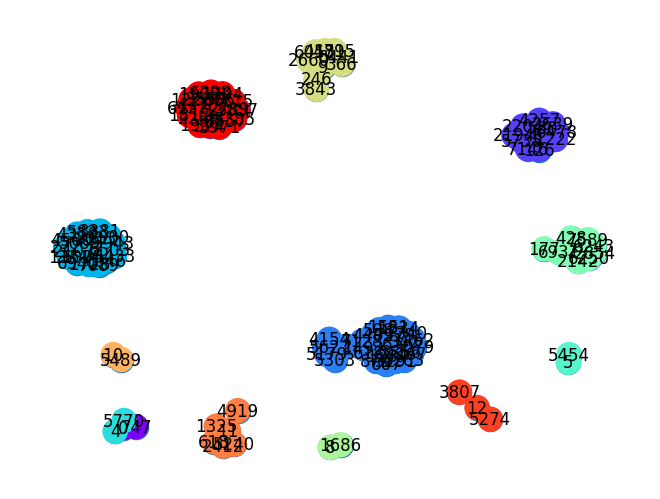

In [10]:
graph_community(G, community=louvain)

In [13]:
# # Visualize the graph
# nx.draw(G, with_labels=False)
# plt.show()

In [14]:
get_metrics(G, louvain)

{'modularity': 0.8414000000000001,
 'partition_quality': (1.0, 0.8866502866502867)}

## k-Clique

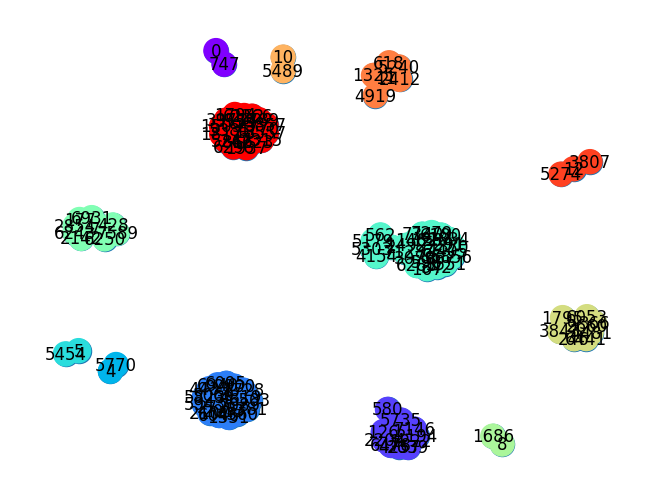

In [14]:
cliques = list(nx.community.k_clique_communities(G, 2))
graph_community(G, community=cliques)

# Influence Maximization

## words